In [77]:
# importing data manipulation as well as plotting packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# importing statistical packages
import statsmodels.api as sm
import scipy

%matplotlib inline

# Sentry Shoals Dataset

In [194]:
# importing the environment canada data set with the date as the index column
gwv_data = pd.read_csv('../c46131.csv', sep=',', index_col='DATE')

# Deleting empty columns
del gwv_data['WSS$']
del gwv_data['WSS$.1']
gwv_data.head()

,STN_ID,Q_FLAG,LATITUDE,LONGITUDE,DEPTH,sig_wave_height,wave_spectrum_peak_period,sig_wave_height_bouy,maximum_zero_crossing_wave,wave_spectrum_peak_period_bouy,wind_direction,wind_speed,wind_gust_speed,wind_direction.1,wind_speed.1,wind_gust_speed.1,sea_level_atmospheric_pressure,sea_level_atmospheric_pressure.1,dry_bulb_air_temperature,sea_surface_temperature
DATE,,,,,,,,,,,,,,,,,,,,
10/20/1992 12:09,C46131,1,49.91,124.99,18,2.31,5.89,2.4,4.8,5.9,124,12.5,15.2,118,11.9,14.5,998.0,990.1,12.0,10.3
10/20/1992 13:09,C46131,1,49.91,124.99,18,2.18,6.92,2.3,4.5,6.9,140,14.4,17.3,134,13.8,16.9,998.1,990.1,12.8,10.3
10/20/1992 14:09,C46131,1,49.91,124.99,18,2.34,6.40,2.4,4.2,6.4,138,12.8,15.6,132,12.3,15.1,997.7,990.1,12.9,10.2
10/20/1992 15:09,C46131,1,49.91,124.99,18,2.02,6.40,2.1,4.1,6.4,149,11.8,14.1,143,11.3,13.7,999.5,990.1,12.7,10.2
10/20/1992 16:09,C46131,1,49.91,124.99,18,1.54,6.40,1.6,3.2,6.4,178,7.9,10.5,172,7.6,10.1,1001.5,990.1,12.4,10.2


In [79]:
# Chagning the data index (time) into pandas datetime format
gwv_data.index = pd.to_datetime(gwv_data.index, unit='m')

# Collapsing the data so that all data are averaged over a 1 month perdiod
gwv_monthly = gwv_data.resample('M', how=('mean'))
gwv_monthly.head()

,Q_FLAG,LATITUDE,LONGITUDE,DEPTH,sig_wave_height,wave_spectrum_peak_period,sig_wave_height_bouy,maximum_zero_crossing_wave,wave_spectrum_peak_period_bouy,wind_direction,wind_speed,wind_gust_speed,wind_direction.1,wind_speed.1,wind_gust_speed.1,sea_level_atmospheric_pressure,sea_level_atmospheric_pressure.1,dry_bulb_air_temperature,sea_surface_temperature
DATE,,,,,,,,,,,,,,,,,,,
1992-10-31,1.498069,49.91,124.99,18,0.639846,3.845676,0.665637,1.353282,13.461390,187.185328,5.591506,7.018919,185.845560,5.377992,6.810425,1010.201158,990.1,10.590347,10.552896
1992-11-30,2.033019,49.91,124.99,18,0.443522,3.438789,0.473113,0.948585,19.895755,173.790881,5.152044,6.367767,175.773585,4.983648,6.170755,1019.930975,990.1,7.952987,9.695440
1992-12-31,2.487138,49.91,124.99,18,0.521350,3.582203,0.552733,1.116077,22.503215,214.059486,5.855627,7.361415,218.347267,5.667685,7.158039,1014.832958,990.1,4.358521,8.273633
1993-01-31,2.770370,49.91,124.99,18,0.384593,3.173941,0.412296,0.841481,24.302222,223.434074,5.042370,6.378074,221.640000,4.872593,6.189037,1016.453185,990.1,3.297037,7.243556
1993-02-28,2.196460,49.91,124.99,18,0.157274,3.007274,0.164425,0.354690,20.306726,207.605310,2.935044,3.775398,209.541593,2.816991,3.657345,1018.012743,990.1,5.536814,7.602655


In [193]:
# Subsetting the data for the last 11 years (this is the time period for which the plankton data have been collected)
gwv_modern = gwv_monthly['2005-01-01':'2015-10-31']
gwv_modern.head(n=5)

,Q_FLAG,LATITUDE,LONGITUDE,DEPTH,sig_wave_height,wave_spectrum_peak_period,sig_wave_height_bouy,maximum_zero_crossing_wave,wave_spectrum_peak_period_bouy,wind_direction,wind_speed,wind_gust_speed,wind_direction.1,wind_speed.1,wind_gust_speed.1,sea_level_atmospheric_pressure,sea_level_atmospheric_pressure.1,dry_bulb_air_temperature,sea_surface_temperature
DATE,,,,,,,,,,,,,,,,,,,
2005-01-31,1.409459,49.91,124.99,14,0.368446,3.703676,0.367973,0.697027,3.603378,206.602703,5.264324,6.656216,204.608108,5.347297,6.777162,1015.986486,1015.981081,4.918108,7.245676
2005-02-28,1.873874,49.91,124.99,14,0.226757,3.811862,0.221171,0.565465,3.505856,230.183183,3.895495,4.872072,226.009009,3.941291,4.956156,1019.557357,1019.563363,5.710661,7.261562
2005-03-31,1.432099,49.91,124.99,14,0.379520,3.638724,0.378738,1.016049,3.503155,194.122085,5.304664,6.520439,192.533608,5.334294,6.586145,1014.696845,1014.736351,8.226337,8.755144
2005-04-30,1.531161,49.91,124.99,14,0.480354,3.858300,0.476912,1.323938,3.758782,194.838527,5.837960,7.234136,190.950425,5.794051,7.208074,1014.522663,1014.573088,10.098725,10.296459
2005-05-31,1.518268,49.91,124.99,14,0.302179,3.242327,0.298647,1.072666,3.144114,209.167794,4.934777,5.959811,204.784844,4.875643,5.938836,1013.208931,1013.316103,13.606901,13.626116


In [106]:
# Checking the size of this new dataset
gwv_modern.shape

(130, 19)

After examining several of the varaibles in the Sentry Shoals data set, I decided to investigate the relationship between sea surface temperature and significant wave height. 

Question: What is the affect of sea surface temperature on significant wave height?

From my experience growing up on Vancouver Island, I know that the winters around the Strait of Georgia are generally more storm filled than the summers. Additionally from my experience examining the dataset, I would hypothesize that this greater prevalance of storms in the winter translates to greater average wind speeds and potentially greater average wave height. I also know that the surface water in the Strait of Georgia is colder in the winter, due to colder air temperatures. Thus my hypothesis is that sea surface temperature and significant wave height have a negative relationship at Sentry Shoals. Thus when the water is colder the wave height is larger, and when the water is warmer then the wave height is smaller. 

//anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


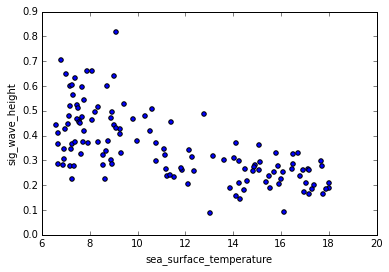

In [111]:
# Plotting the sea surface temperature against signficant wave height
gwv_modern.plot(kind='scatter', x= 'sea_surface_temperature', y='sig_wave_height')

In [187]:
# dropping the rows where naN's are present in anticipation of calculating the linear model
gwv_modern = gwv_modern.dropna()
gwv_modern.head()

,Q_FLAG,LATITUDE,LONGITUDE,DEPTH,sig_wave_height,wave_spectrum_peak_period,sig_wave_height_bouy,maximum_zero_crossing_wave,wave_spectrum_peak_period_bouy,wind_direction,wind_speed,wind_gust_speed,wind_direction.1,wind_speed.1,wind_gust_speed.1,sea_level_atmospheric_pressure,sea_level_atmospheric_pressure.1,dry_bulb_air_temperature,sea_surface_temperature
DATE,,,,,,,,,,,,,,,,,,,
2005-01-31,1.409459,49.91,124.99,14,0.368446,3.703676,0.367973,0.697027,3.603378,206.602703,5.264324,6.656216,204.608108,5.347297,6.777162,1015.986486,1015.981081,4.918108,7.245676
2005-02-28,1.873874,49.91,124.99,14,0.226757,3.811862,0.221171,0.565465,3.505856,230.183183,3.895495,4.872072,226.009009,3.941291,4.956156,1019.557357,1019.563363,5.710661,7.261562
2005-03-31,1.432099,49.91,124.99,14,0.379520,3.638724,0.378738,1.016049,3.503155,194.122085,5.304664,6.520439,192.533608,5.334294,6.586145,1014.696845,1014.736351,8.226337,8.755144
2005-04-30,1.531161,49.91,124.99,14,0.480354,3.858300,0.476912,1.323938,3.758782,194.838527,5.837960,7.234136,190.950425,5.794051,7.208074,1014.522663,1014.573088,10.098725,10.296459
2005-05-31,1.518268,49.91,124.99,14,0.302179,3.242327,0.298647,1.072666,3.144114,209.167794,4.934777,5.959811,204.784844,4.875643,5.938836,1013.208931,1013.316103,13.606901,13.626116


In [146]:
# calculating the linear model for significant wave height and sea surface temperature
lm = sm.formula.ols(formula='sig_wave_height ~ sea_surface_temperature', data = gwv_modern).fit()

In [196]:
# Creating a new data frame with the range of x values that we will pass the linear model
range_data_x = pd.DataFrame({'sea_surface_temperature': range(6, 19)})
range_data_x.head()

,sea_surface_temperature
0,6
1,7
2,8
3,9
4,10


In [197]:
# Calculating the linear model predictions from the x values in our range data set
y_preds = lm.predict(range_data_x)
y_preds[1:10]

array([ 0.45946216,  0.43503807,  0.41061399,  0.3861899 ,  0.36176581,
        0.33734172,  0.31291763,  0.28849354,  0.26406946])

//anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


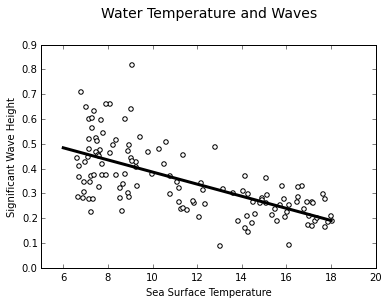

In [208]:
# Plotting sea surface temperature and significant wave height again... But this time with the linear model included
gwv_modern.plot(kind='scatter', x= 'sea_surface_temperature', y='sig_wave_height', color='w')

plt.xlabel('Sea Surface Temperature')
plt.ylabel('Significant Wave Height')
plt.title('Water Temperature and Waves', y=1.1, fontsize=14)

plt.xlim(5, 20)
plt.ylim(0,0.9)

plt.plot(x_new, y_preds, color='k', linewidth=3)

In [198]:
# Obtaining the intercept and slope of the linear model
lm.params

Intercept                  0.630431
sea_surface_temperature   -0.024424
dtype: float64

In [185]:
# Obtaining the linear regression statistical summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:        sig_wave_height   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     97.20
Date:                Thu, 05 Nov 2015   Prob (F-statistic):           2.25e-17
Time:                        10:08:12   Log-Likelihood:                 108.09
No. Observations:                 129   AIC:                            -212.2
Df Residuals:                     127   BIC:                            -206.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Intercept                 

The linear model and statistical analysis confirmed my hypothesis that sea surface temperature and significant wave height are inversely proportional. However, this relationship is weaker than I had anticipated. On average, for every degree increase of the monthly average water temperature, there is a 0.024 decrease in the average wave height. Additionally, the R squared value of the relationship was only 0.434, meaning that only about 43% of the varability in significant wave height is explainable by the varaitiability in sea surface temperature. These results surprised me a little. I would have thought that the average wave height would have been affected much more by the sea surface temperature. I would have thought that the R squared value would have been higher at like 0.7 or more. I know that surface water temperature is closely linked to the air temperture, and thus follows the seasonal trend closely. So perhaps my hypothesis of a strong link between storm frequency and seasons, is slightly faulty. Perhpas, storm frequency is more uniformly distributed throughout the year than I originally hypothesized. Or perhaps the average wind strength is just more uniformly distrbuted throughout the year than I orginially hyposthesized, regarless of storm trend. In any case, the only way can investigate further is to do more statistical analysis. 